In [1]:
%pip install seaborn
%pip install -U scikit-learn


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from turtle import color
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import style


In [3]:
#Cargamos el archivo diamonds.csv
data= pd.read_csv('diamonds.csv')

#tamaño (x, y, z) y price
data["tamaño"]= data['x'] * data['y'] * data['z']
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
0,0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...
53880,53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53881,53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53882,53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53883,53938,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74,140.766120


In [4]:
#Identificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
tamaño        0
dtype: int64

**Limpieza de Nulos**

Vemos que tenemos valores nulos solo en variables numéricas, por lo que aplicaremos diferentes metodos para lidiar con esos valores nulos

In [5]:
#Sustituir por la media
mean_carat=data['carat'].mean() 
data['carat'].fillna(value=mean_carat, inplace=True) 

#Sustituir por el objeto "anterior" de la columna
data["depth"] =data["depth"].fillna(method="bfill") 

#Sustituir por la mediana
median_table=data['table'].median() 
data['table'].fillna(value=median_table, inplace=True) 

median_price=data['price'].median() 
data['price'].fillna(value=median_price, inplace=True) 

#Sustituir por la media
mean_x=data['x'].mean() 
data['x'].fillna(value=mean_x, inplace=True) 

mean_y=data['y'].mean() 
data['y'].fillna(value=mean_y, inplace=True) 

mean_z=data['z'].mean() 
data['z'].fillna(value=mean_z, inplace=True) 

In [6]:
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

**Limpieza de Outliers**

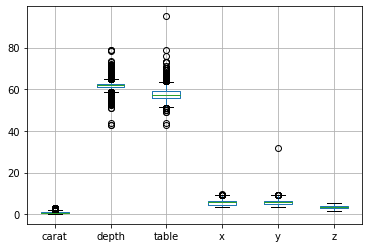

In [7]:
#Diagrama para ver la distribución de los datos de las variables numéricas
boxplot = data.boxplot(column=['carat', 'depth', 'table','x','y','z'])  

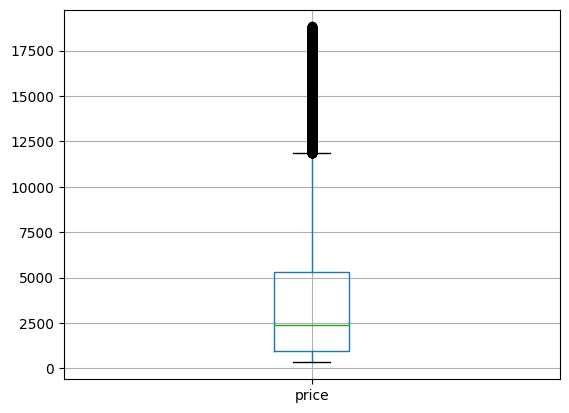

In [8]:
boxplot = data.boxplot(column=['price'])  

In [9]:
#Se aplicará el metodo de Desviación Estandar con 3 desviaciones debido a que 
#así cubrimos el 99% de nuestros datos y dejamos la menor cantidad de valores fuera

#Carat

y=data["carat"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_carat= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_carat

Limite superior permitido 2.2056942343648585
Limite inferior permitido -0.6132817338757863


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
13749,13757,2.22,Fair,J,I1,66.7,56.0,5607.0,8.04,8.02,5.36,345.617088
14130,14138,2.27,Fair,J,I1,67.6,55.0,5733.0,8.05,8.00,5.43,349.692000
15675,15684,2.49,Fair,J,I1,66.3,58.0,6289.0,8.26,8.18,5.45,368.239060
16330,16341,2.21,Premium,H,I1,62.2,58.0,6535.0,8.31,8.27,5.16,354.614292
16428,16439,2.22,Fair,H,I1,70.1,55.0,6564.0,7.77,7.74,5.44,327.160512
...,...,...,...,...,...,...,...,...,...,...,...,...
27676,27726,2.36,Premium,H,SI2,59.4,58.0,18745.0,8.69,8.75,5.18,393.874250
27677,27727,2.61,Ideal,I,SI2,62.1,56.0,18756.0,8.85,8.73,5.46,421.842330
27681,27731,2.55,Premium,I,VS1,61.8,62.0,18766.0,8.70,8.65,5.36,403.366800
27693,27744,2.29,Premium,I,SI1,61.8,59.0,18797.0,8.52,8.45,5.24,377.248560


In [10]:
#depth

y2=data["depth"]
Limite_Superior2= y2.mean() + 3*y2.std()
Limite_Inferior2= y2.mean() - 3*y2.std()
print("Limite superior permitido", Limite_Superior2)
print("Limite inferior permitido", Limite_Inferior2)

#Encontramos Ouliers
outliers_depth= data[(y2>Limite_Superior2)|(y2<Limite_Inferior2)]
outliers_depth

Limite superior permitido 66.04080044921432
Limite inferior permitido 57.455708783410735


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
91,91,0.86,Fair,E,SI2,55.1,69.0,2757.0,6.45,6.33,3.52,143.716320
97,97,0.96,Fair,F,SI2,66.3,62.0,2759.0,6.27,5.95,4.07,151.837455
204,204,0.98,Fair,H,SI2,67.9,60.0,2777.0,6.05,5.97,4.08,147.363480
221,221,0.70,Good,E,VS1,57.2,62.0,2782.0,5.81,5.77,3.31,110.963447
...,...,...,...,...,...,...,...,...,...,...,...,...
53672,53727,0.78,Fair,E,SI2,66.9,57.0,2721.0,5.70,5.66,3.60,116.143200
53701,53756,0.84,Fair,G,VS1,55.6,64.0,2724.0,6.42,6.32,3.54,143.633376
53702,53757,0.72,Fair,F,VS2,55.4,64.0,2724.0,6.06,5.97,3.34,120.835188
53745,53800,0.90,Fair,I,VS1,68.7,62.0,2732.0,5.83,5.79,3.99,134.685243


In [11]:
#table

y3=data["table"]
Limite_Superior3= y3.mean() + 3*y3.std()
Limite_Inferior3= y3.mean() - 3*y3.std()
print("Limite superior permitido", Limite_Superior3)
print("Limite inferior permitido", Limite_Inferior3)

#Encontramos Ouliers
outliers_table= data[(y3>Limite_Superior3)|(y3<Limite_Inferior3)]
outliers_table

Limite superior permitido 64.15825069412362
Limite inferior permitido 50.75535420519899


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
2,2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
91,91,0.86,Fair,E,SI2,55.1,69.0,2757.0,6.45,6.33,3.52,143.716320
227,227,0.84,Fair,G,SI1,55.1,67.0,2782.0,6.39,6.20,3.47,137.474460
296,296,0.70,Fair,G,VVS1,58.8,66.0,2797.0,5.81,5.90,3.44,117.919760
314,314,0.76,Fair,G,VS1,59.0,70.0,2800.0,5.89,5.80,3.46,118.200520
...,...,...,...,...,...,...,...,...,...,...,...,...
53487,53542,0.78,Fair,H,VS2,54.7,67.0,2691.0,6.25,6.15,3.40,130.687500
53605,53660,0.71,Fair,F,VS1,57.3,67.0,2707.0,5.96,5.76,3.36,115.347456
53640,53695,0.75,Good,E,VS2,59.7,65.0,2717.0,5.85,5.80,3.48,118.076400
53642,53697,0.70,Fair,H,VVS2,64.5,65.0,2717.0,5.52,5.45,3.54,106.497360


In [12]:
#x

y4=data["x"]
Limite_Superior4= y4.mean() + 3*y4.std()
Limite_Inferior4= y4.mean() - 3*y4.std()
print("Limite superior permitido", Limite_Superior4)
print("Limite inferior permitido", Limite_Inferior4)

#Encontramos Ouliers
outliers_x= data[(y4>Limite_Superior4)|(y4<Limite_Inferior4)]
outliers_x

Limite superior permitido 9.078215311101992
Limite inferior permitido 2.3807332336942006


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
19852,19866,2.68,Premium,G,I1,58.6,60.0,8419.0,9.11,9.07,5.33,440.405641
22722,22741,3.01,Fair,H,I1,56.1,62.0,10761.0,9.54,9.38,5.31,475.166412
22812,22831,3.00,Good,I,I1,57.0,64.0,10863.0,9.38,9.31,5.33,465.457174
23560,23580,2.72,Ideal,H,I1,59.6,55.0,11594.0,9.17,9.13,5.45,456.285445
24789,24816,3.00,Premium,G,I1,59.7,60.0,13203.0,9.42,9.26,5.58,486.738936
25433,25460,3.01,Premium,G,SI2,59.8,58.0,14220.0,9.44,9.37,5.62,497.104736
25751,25778,2.58,Very Good,D,SI2,58.9,63.0,14749.0,9.08,9.01,5.33,436.051564
25823,25850,3.00,Good,J,SI2,59.3,64.0,14918.0,9.32,9.19,5.50,471.079400
26894,26932,3.00,Premium,I,SI2,60.7,59.0,16970.0,9.30,9.14,5.60,476.011200
26977,27016,2.71,Premium,E,SI2,60.4,59.0,17146.0,9.13,9.03,5.48,451.792572


In [13]:
#price

y5=data["price"]
Limite_Superior5= y5.mean() + 3*y5.std()
Limite_Inferior5= y5.mean() - 3*y5.std()
print("Limite superior permitido", Limite_Superior5)
print("Limite inferior permitido", Limite_Inferior5)

#Encontramos Ouliers
outliers_price= data[(y5>Limite_Superior5)|(y5<Limite_Inferior5)]
outliers_price

Limite superior permitido 15864.638410926327
Limite inferior permitido -8014.8239170968745


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
26348,26381,2.08,Premium,E,SI2,62.3,59.0,15873.0,8.22,8.16,5.10,342.083520
26349,26382,2.04,Ideal,H,SI2,61.2,56.0,15874.0,8.19,8.25,5.03,339.864525
26350,26383,1.30,Ideal,E,IF,62.3,54.0,15874.0,6.97,7.03,4.36,213.636076
26351,26384,2.02,Very Good,G,SI2,62.8,55.0,15877.0,8.06,8.11,5.08,332.062328
26352,26385,1.23,Very Good,E,VVS1,61.2,59.0,15878.0,6.90,6.98,4.25,204.688500
...,...,...,...,...,...,...,...,...,...,...,...,...
27694,27745,2.00,Very Good,H,SI1,62.8,57.0,18803.0,7.95,8.00,5.01,318.636000
27695,27746,2.07,Ideal,G,SI2,62.5,55.0,18804.0,8.20,8.13,5.11,340.663260
27696,27747,1.51,Ideal,G,IF,61.7,55.0,18806.0,7.37,7.41,4.56,249.029352
27697,27748,2.00,Very Good,G,SI1,63.5,56.0,18818.0,7.90,7.97,5.04,317.333520


In [14]:
#y

y6=data["y"]
Limite_Superior6= y6.mean() + 3*y6.std()
Limite_Inferior6= y6.mean() - 3*y6.std()
print("Limite superior permitido", Limite_Superior6)
print("Limite inferior permitido", Limite_Inferior6)

#Encontramos Ouliers
outliers_y= data[(y6>Limite_Superior6)|(y6<Limite_Inferior6)]
outliers_y

Limite superior permitido 9.073585685208744
Limite inferior permitido 2.3900700455251185


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
22722,22741,3.01,Fair,H,I1,56.1,62.0,10761.0,9.54,9.38,5.31,475.166412
22812,22831,3.00,Good,I,I1,57.0,64.0,10863.0,9.38,9.31,5.33,465.457174
23560,23580,2.72,Ideal,H,I1,59.6,55.0,11594.0,9.17,9.13,5.45,456.285445
24789,24816,3.00,Premium,G,I1,59.7,60.0,13203.0,9.42,9.26,5.58,486.738936
25433,25460,3.01,Premium,G,SI2,59.8,58.0,14220.0,9.44,9.37,5.62,497.104736
25823,25850,3.00,Good,J,SI2,59.3,64.0,14918.0,9.32,9.19,5.50,471.079400
26894,26932,3.00,Premium,I,SI2,60.7,59.0,16970.0,9.30,9.14,5.60,476.011200
27470,27514,3.01,Premium,I,SI2,60.2,59.0,18242.0,9.36,9.31,5.62,489.735792
27589,27638,3.04,Premium,I,SI2,59.3,60.0,18559.0,9.51,9.46,5.62,505.601052
27600,27649,3.01,Good,H,SI2,57.6,64.0,18593.0,9.44,9.38,5.42,479.925824


In [15]:
#z

y7=data["z"]
Limite_Superior7= y7.mean() + 3*y7.std()
Limite_Inferior7= y7.mean() - 3*y7.std()
print("Limite superior permitido", Limite_Superior7)
print("Limite inferior permitido", Limite_Inferior7)

#Encontramos Ouliers
outliers_z= data[(y7>Limite_Superior7)|(y7<Limite_Inferior7)]
outliers_z

Limite superior permitido 5.605483181807177
Limite inferior permitido 1.4707252225903011


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
20448,20462,2.74,Fair,J,I1,64.9,61.0,8807.0,8.76,8.66,5.65,428.618040
25433,25460,3.01,Premium,G,SI2,59.8,58.0,14220.0,9.44,9.37,5.62,497.104736
27026,27065,2.74,Very Good,H,SI2,63.3,58.0,17184.0,8.88,8.84,5.61,440.380512
27470,27514,3.01,Premium,I,SI2,60.2,59.0,18242.0,9.36,9.31,5.62,489.735792
27589,27638,3.04,Premium,I,SI2,59.3,60.0,18559.0,9.51,9.46,5.62,505.601052
27634,27684,3.01,Premium,J,SI2,60.7,59.0,18710.0,9.35,9.22,5.64,486.207480


In [16]:
#Creamos un nuevo dataframe con los valores ya sustituidos
data2=data[(y<=Limite_Superior)&(y>=Limite_Inferior)] 
data2["carat"]=data2["carat"].fillna(round(data["carat"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/2743125992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["carat"]=data2["carat"].fillna(round(data["carat"].mean(),2))


In [17]:
data2=data[(y2<=Limite_Superior2)&(y2>=Limite_Inferior2)] 
data2["depth"]=data2["depth"].fillna(round(data["depth"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/727645140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["depth"]=data2["depth"].fillna(round(data["depth"].mean(),2))


In [18]:
data2=data[(y3<=Limite_Superior3)&(y3>=Limite_Inferior3)] 
data2["table"]=data2["table"].fillna(round(data["table"].median(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/1440715820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["table"]=data2["table"].fillna(round(data["table"].median(),2))


In [19]:
data2=data[(y4<=Limite_Superior4)&(y4>=Limite_Inferior4)] 
data2["x"]=data2["x"].fillna(round(data["x"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/928572613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["x"]=data2["x"].fillna(round(data["x"].mean(),2))


In [20]:
data2=data[(y5<=Limite_Superior5)&(y5>=Limite_Inferior5)] 
data2["price"]=data2["price"].fillna(round(data["price"].median(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/2525866675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["price"]=data2["price"].fillna(round(data["price"].median(),2))


In [21]:
data2=data[(y6<=Limite_Superior6)&(y6>=Limite_Inferior6)] 
data2["y"]=data2["y"].fillna(round(data["y"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/2835758671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["y"]=data2["y"].fillna(round(data["y"].mean(),2))


In [22]:
data2=data[(y7<=Limite_Superior7)&(y7>=Limite_Inferior7)] 
data2["z"]=data2["z"].fillna(round(data["z"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_34534/28414975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["z"]=data2["z"].fillna(round(data["z"].mean(),2))


In [23]:
data2.to_csv("diamonds_clean.csv")

**Análisis de Correlaciones con la columna precio**

Encontrar la correlación que existe entre las siguientes variables con la columna precio:

In [24]:
data3=data2

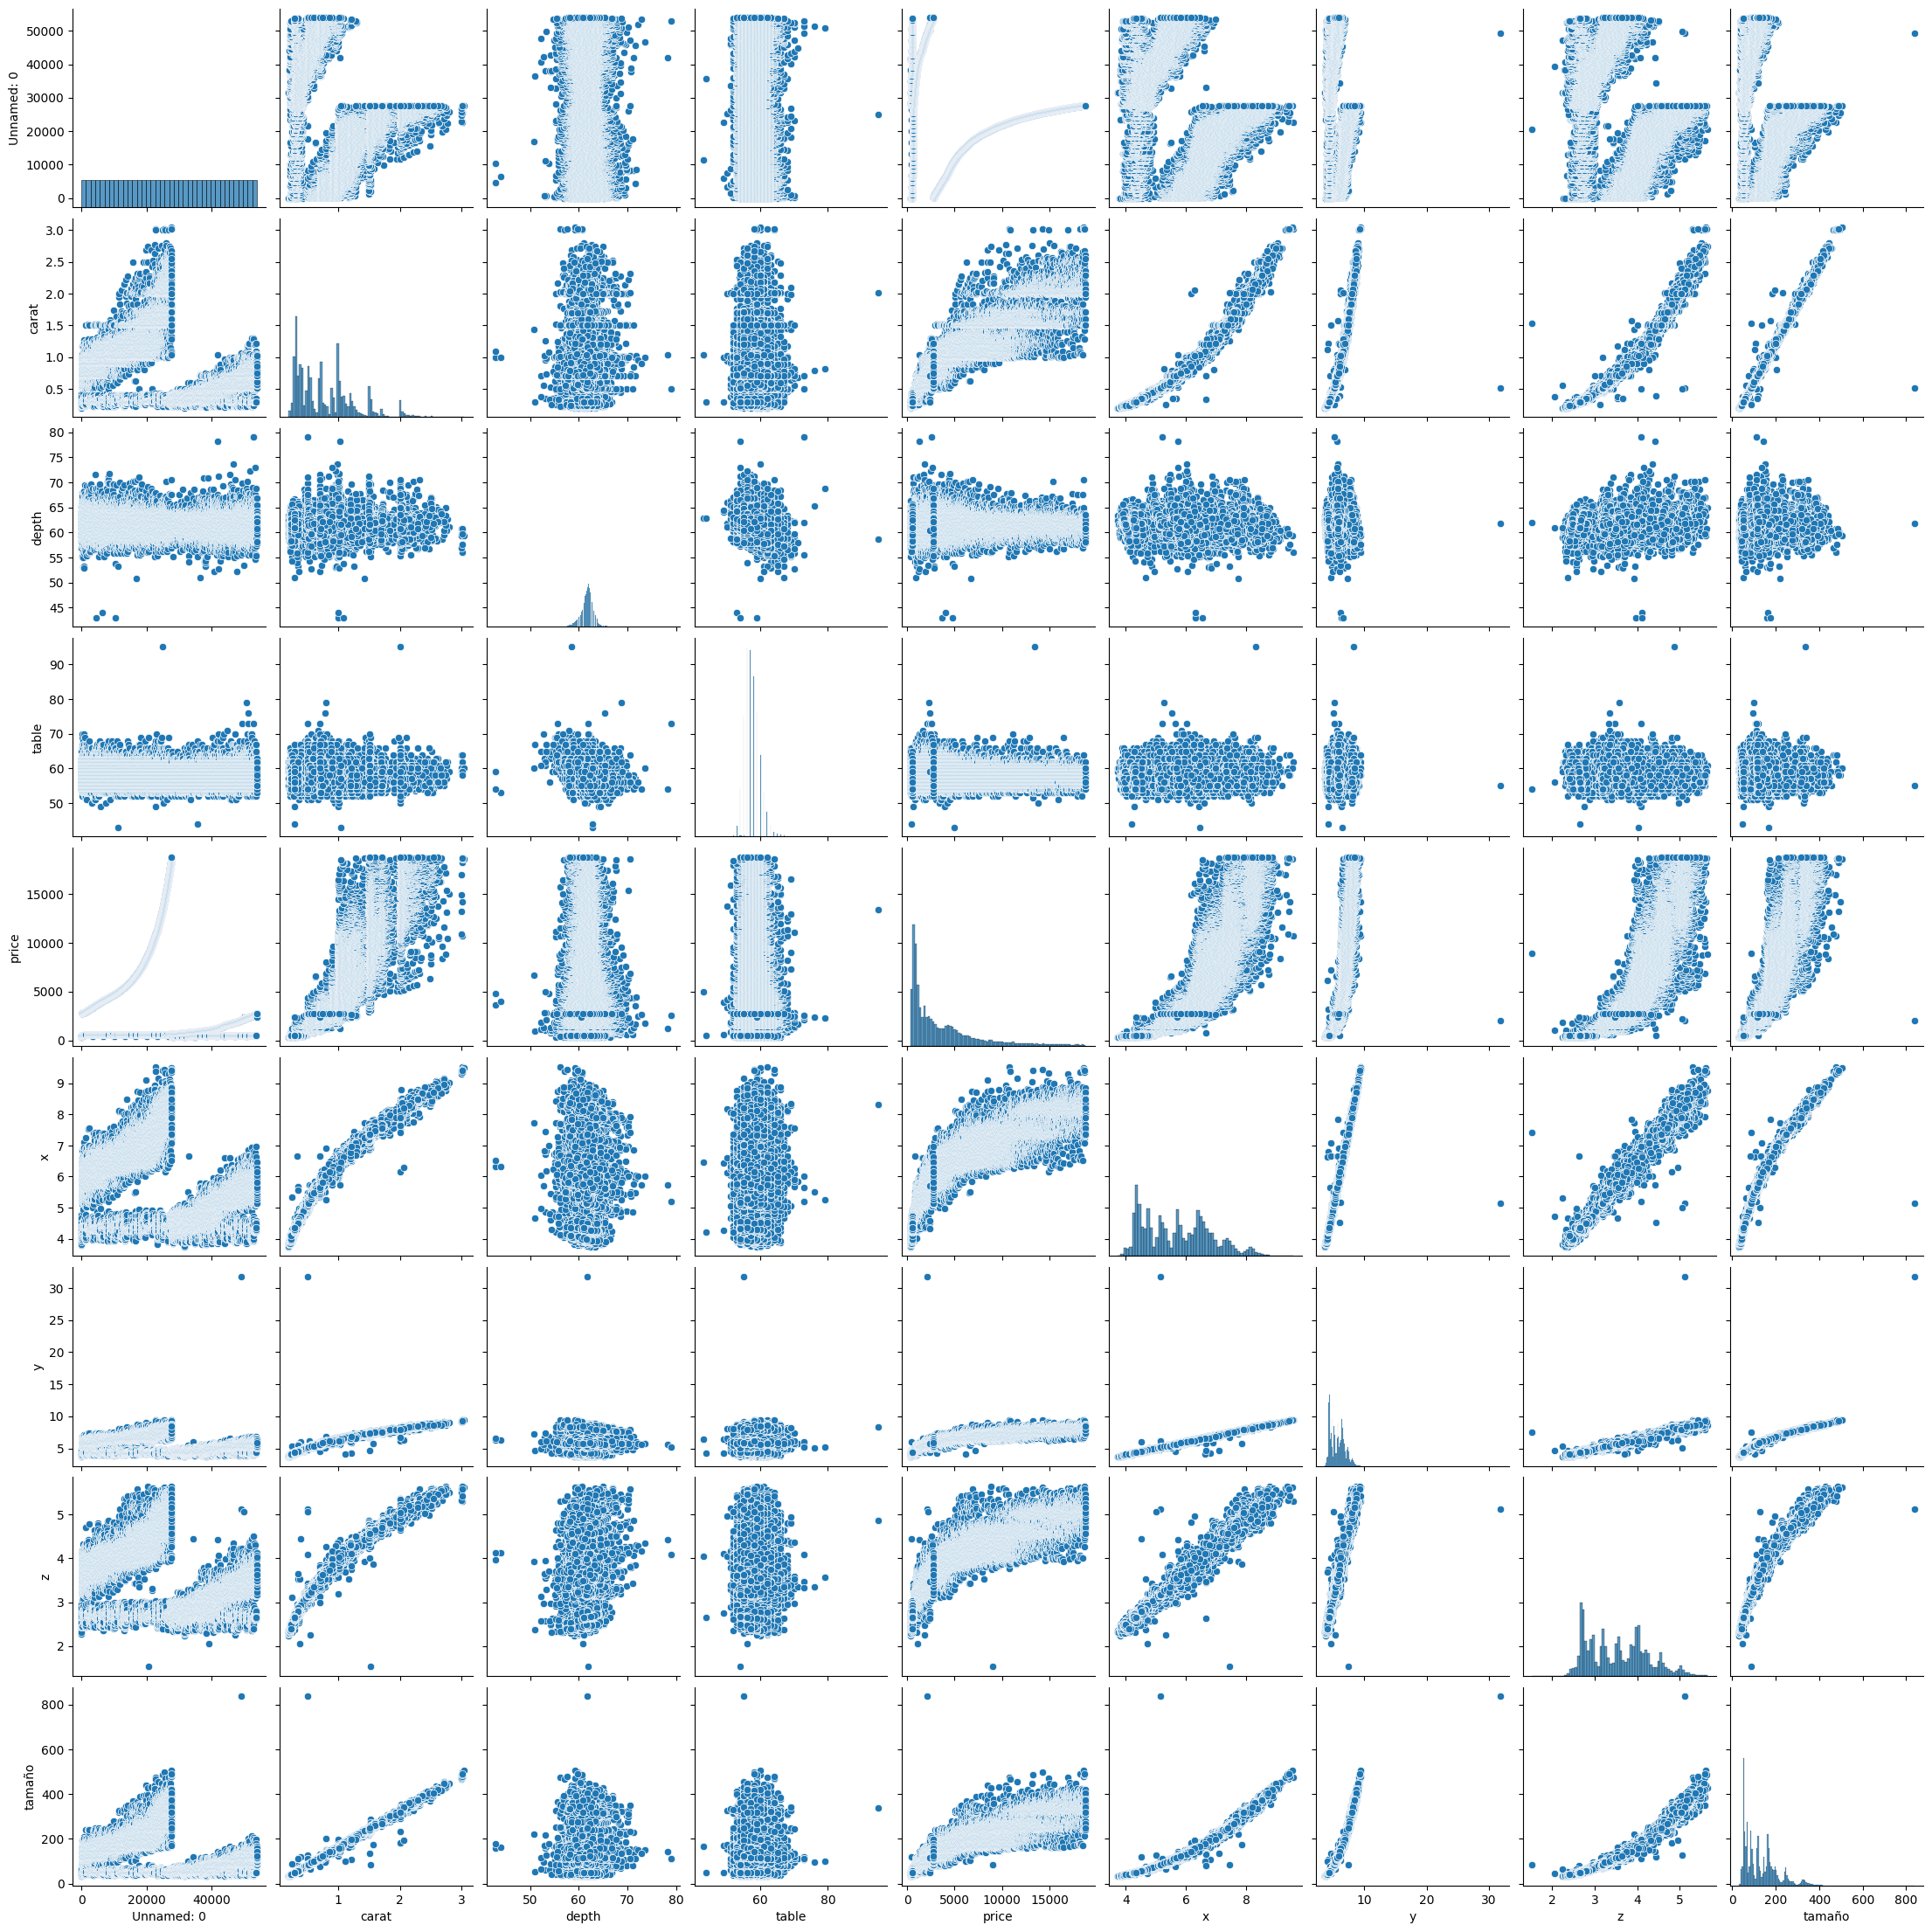

In [25]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(data)

***Carat y Precio***

In [26]:
#Carat y Precio

model=smf.ols(formula="price~carat", data=data3).fit()
model.params

Intercept   -2306.763592
carat        7827.352383
dtype: float64

In [27]:
#Agregamos la columna de predicción al dataframe
Form= -2306.763592 + 7827.352383*data3["carat"]
data3.insert(loc=1, column='Predicciones_1', value=Form)
data3

,Unnamed: 0,Predicciones_1,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
0,0,-506.472544,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,1,-663.019592,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,2,-506.472544,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,3,-36.831401,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,4,119.715647,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53880,53935,3328.930124,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53881,53936,3328.930124,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53882,53937,3172.383076,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53883,53938,4424.759457,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74,140.766120


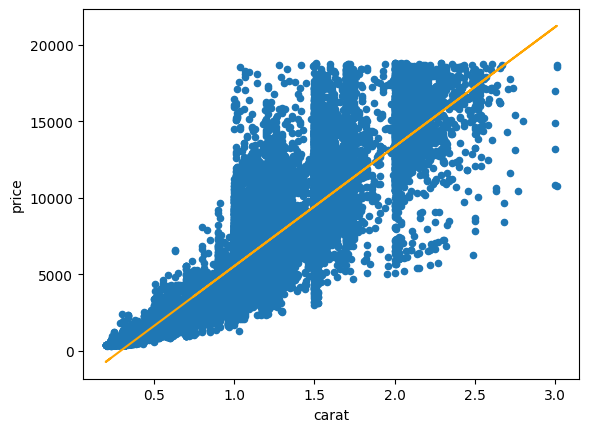

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 3.121e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:12:13   Log-Likelihood:            -4.7141e+05
No. Observations:               53879   AIC:                         9.428e+05
Df Residuals:                   53877   BIC:                         9.428e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2306.7636     12.946   -178.185      0.000   -2332.138   -2281.390
carat       7827.3524     14.010    558.685      0.000    7799.892    7854.813
==============================================================================
Omnibus:                    14740.727   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106945.327
Skew:                           1.124   Prob(JB):                         0.00
Kurtosis:                       9.525   Cond. No.                         3.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Graficamos los valores predecidos y los valores reales
data3.plot(kind="scatter", x="carat", y="price")
plt.plot(pd.DataFrame(data3["carat"]), pd.DataFrame(data3["Predicciones_1"]), c='orange')
plt.show()

#Calculamos el coeficiente de Determinación R cuadrado
model.summary()


***depth y Precio***

In [29]:
#depth y Precio

model2=smf.ols(formula="price~depth", data=data3).fit()
model2.params

Intercept    6143.269860
depth         -35.947585
dtype: float64

In [30]:
#Agregamos la columna de predicción al dataframe
Form2= 6143.269860 -35.947585*data3["depth"]
data3.insert(loc=1, column='Predicciones_2', value=Form2)
data3

,Unnamed: 0,Predicciones_2,Predicciones_1,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
0,0,3932.493383,-506.472544,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,1,3993.604277,-663.019592,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,2,4097.852274,-506.472544,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,3,3900.140556,-36.831401,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,4,3867.787730,119.715647,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53880,53935,3957.656692,3328.930124,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53881,53936,3874.977247,3328.930124,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53882,53937,3885.761522,3172.383076,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53883,53938,3907.330073,4424.759457,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74,140.766120


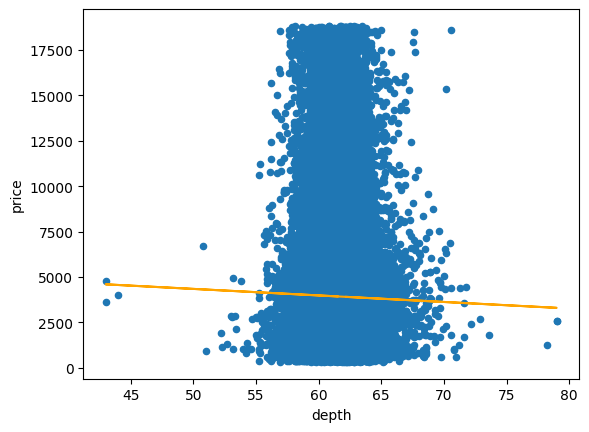

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.008
Date:                Mon, 26 Sep 2022   Prob (F-statistic):            0.00269
Time:                        11:12:14   Log-Likelihood:            -5.2302e+05
No. Observations:               53879   AIC:                         1.046e+06
Df Residuals:                   53877   BIC:                         1.046e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6143.2699    739.764      8.304      0.000    4693.326    7593.214
depth        -35.9476     11.977     -3.001      0.003     -59.423     -12.472
==============================================================================
Omnibus:                    15077.455   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34176.311
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                       5.181   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Graficamos los valores predecidos y los valores reales
data3.plot(kind="scatter", x="depth", y="price")
plt.plot(pd.DataFrame(data3["depth"]), pd.DataFrame(data3["Predicciones_2"]), c='orange')
plt.show()

#Calculamos el coeficiente de Determinación R cuadrado
model2.summary()

***table y Precio***

In [32]:
#table y Precio

model3=smf.ols(formula="price~table", data=data3).fit()
model3.params

Intercept   -9077.123069
table         226.269707
dtype: float64

In [33]:
#Agregamos la columna de predicción al dataframe
Form3= -9077.123069 +226.269707*data3["table"]
data3.insert(loc=1, column='Predicciones_3', value=Form3)
data3

,Unnamed: 0,Predicciones_3,Predicciones_2,Predicciones_1,carat,cut,color,clarity,depth,table,price,x,y,z,tamaño
0,0,3367.710816,3932.493383,-506.472544,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,1,4725.329058,3993.604277,-663.019592,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
2,2,5630.407886,4097.852274,-506.472544,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,38.076885
3,3,4046.519937,3900.140556,-36.831401,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,4,4046.519937,3867.787730,119.715647,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53880,53935,3820.250230,3957.656692,3328.930124,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,115.920000
53881,53936,3367.710816,3874.977247,3328.930124,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,118.110175
53882,53937,4499.059351,3885.761522,3172.383076,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,114.449728
53883,53938,4046.519937,3907.330073,4424.759457,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74,140.766120


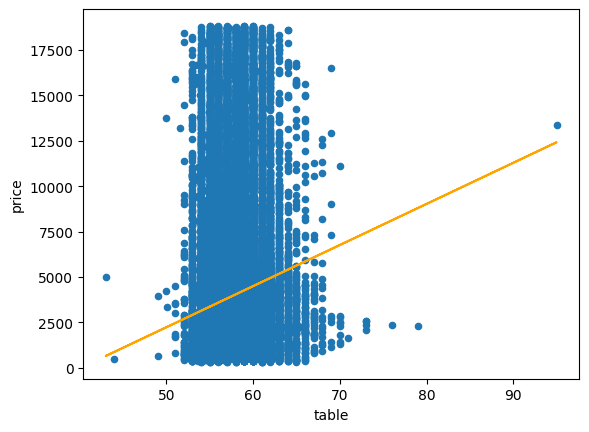

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     884.1
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.01e-192
Time:                        11:12:14   Log-Likelihood:            -5.2259e+05
No. Observations:               53879   AIC:                         1.045e+06
Df Residuals:                   53877   BIC:                         1.045e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9077.1231    437.560    -20.745      0.000   -9934.743   -8219.503
table        226.2697      7.610     29.734      0.000     211.355     241.185
==============================================================================
Omnibus:                    15161.259   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34719.208
Skew:                           1.619   Prob(JB):                         0.00
Kurtosis:                       5.231   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Graficamos los valores predecidos y los valores reales
data3.plot(kind="scatter", x="table", y="price")
plt.plot(pd.DataFrame(data3["table"]), pd.DataFrame(data3["Predicciones_3"]), c='orange')
plt.show()

#Calculamos el coeficiente de Determinación R cuadrado
model3.summary()

***Carat, depth y precio***

In [35]:
#Carat, depth y precio

model4 = smf.ols('price ~ carat + depth', data=data3).fit()
model4.params

Intercept    3678.151341
carat        7834.380638
depth         -97.014970
dtype: float64

In [36]:
#Agregamos la columna de predicción al dataframe
Form4= 3678.151341 + 7834.380638*data3["carat"]-97.014970*data3["depth"]
data3.insert(loc=1, column='Predicciones_4', value=Form4)
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.576e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:12:14   Log-Likelihood:            -4.7119e+05
No. Observations:               53879   AIC:                         9.424e+05
Df Residuals:                   53876   BIC:                         9.424e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3678.1513    282.710     13.010      0.000    3124.038    4232.265
carat       7834.3806     13.956    561.349      0.000    7807.026    7861.735
depth        -97.0150      4.578    -21.192      0.000    -105.988     -88.042
==============================================================================
Omnibus:                    14849.677   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105530.951
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       9.466   Cond. No.                     2.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='carat', ylabel='price'>

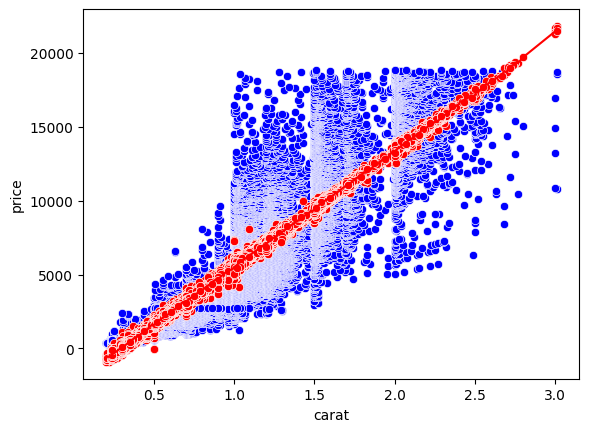

In [37]:
#Carat and Price
sns.scatterplot(x='carat', y='price', color="blue", data=data3)
sns.scatterplot(x='carat', y='Predicciones_4', color="red", data=data3)
sns.lineplot(x='carat', y='Predicciones_4', color="red", data=data3)

<AxesSubplot:xlabel='depth', ylabel='price'>

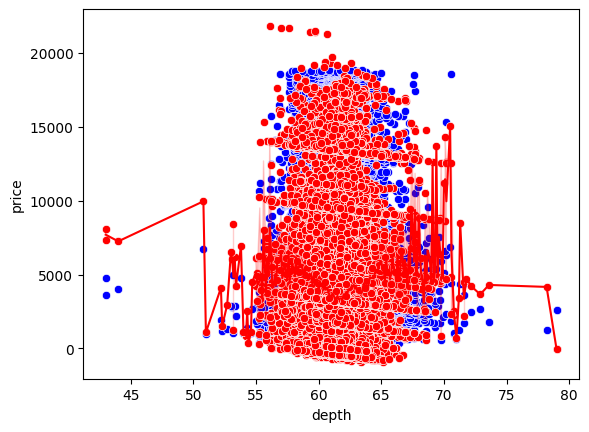

In [38]:
#Depth and Price
sns.scatterplot(x='depth', y='price', color="blue", data=data3)
sns.scatterplot(x='depth', y='Predicciones_4', color="red", data=data3)
sns.lineplot(x='depth', y='Predicciones_4', color="red", data=data3)

***Carat,table y precio***

In [39]:
#Carat,table y precio

model5 = smf.ols('price ~ carat + table', data=data3).fit()
model5.params

Intercept    2036.682297
carat        7893.845208
table         -76.516383
dtype: float64

In [40]:
#Agregamos la columna de predicción al dataframe
Form5= 2036.682297 + 7893.845208*data3["carat"]-76.516383*data3["table"]
data3.insert(loc=1, column='Predicciones_5', value=Form5)
model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.583e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:12:25   Log-Likelihood:            -4.7108e+05
No. Observations:               53879   AIC:                         9.422e+05
Df Residuals:                   53876   BIC:                         9.422e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2036.6823    169.400     12.023      0.000    1704.656    2368.708
carat       7893.8452     14.163    557.345      0.000    7866.085    7921.605
table        -76.5164      2.976    -25.714      0.000     -82.349     -70.684
==============================================================================
Omnibus:                    14687.574   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108666.097
Skew:                           1.114   Prob(JB):                         0.00
Kurtosis:                       9.591   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='carat', ylabel='price'>

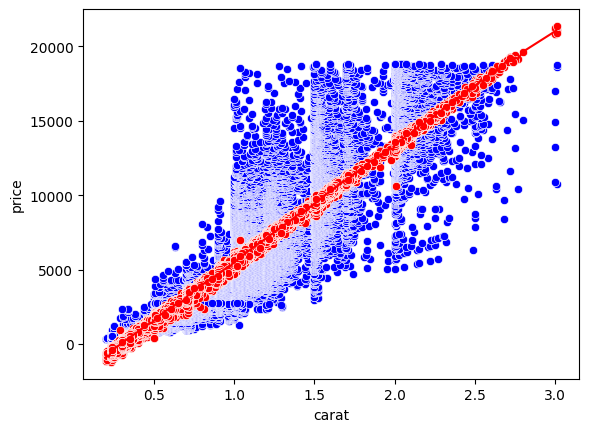

In [41]:
#Carat and Price
sns.scatterplot(x='carat', y='price', color="blue", data=data3)
sns.scatterplot(x='carat', y='Predicciones_5', color="red", data=data3)
sns.lineplot(x='carat', y='Predicciones_5', color="red", data=data3)

<AxesSubplot:xlabel='table', ylabel='price'>

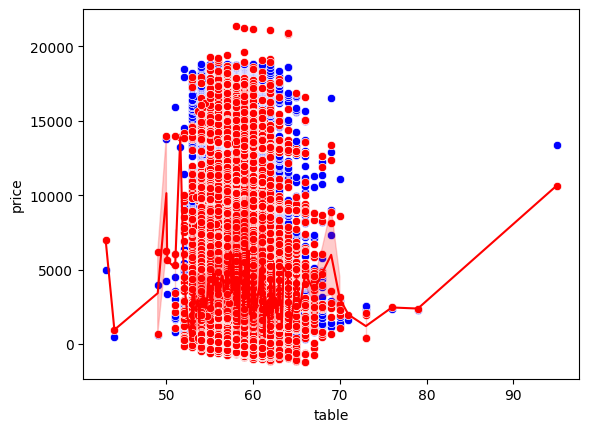

In [42]:
#table and Price
sns.scatterplot(x='table', y='price', color="blue", data=data3)
sns.scatterplot(x='table', y='Predicciones_5', color="red", data=data3)
sns.lineplot(x='table', y='Predicciones_5', color="red", data=data3)

***depth,table y price***

In [43]:
#depth y table
model6 = smf.ols('price ~ depth + table', data=data3).fit()
model6.params

Intercept   -14545.948258
depth           75.279375
table          240.549212
dtype: float64

In [44]:
#Agregamos la columna de predicción al dataframe
Form6= -14545.948258 + 75.279375*data3["depth"]+240.549212*data3["table"]
data3.insert(loc=1, column='Predicciones_6', value=Form6)
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     460.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          4.17e-199
Time:                        11:12:35   Log-Likelihood:            -5.2257e+05
No. Observations:               53879   AIC:                         1.045e+06
Df Residuals:                   53876   BIC:                         1.045e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.455e+04   1003.690    -14.492      0.000   -1.65e+04   -1.26e+04
depth         75.2794     12.435      6.054      0.000      50.907      99.652
table        240.5492      7.965     30.203      0.000     224.939     256.160
==============================================================================
Omnibus:                    15218.362   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34974.959
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                       5.245   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='depth', ylabel='price'>

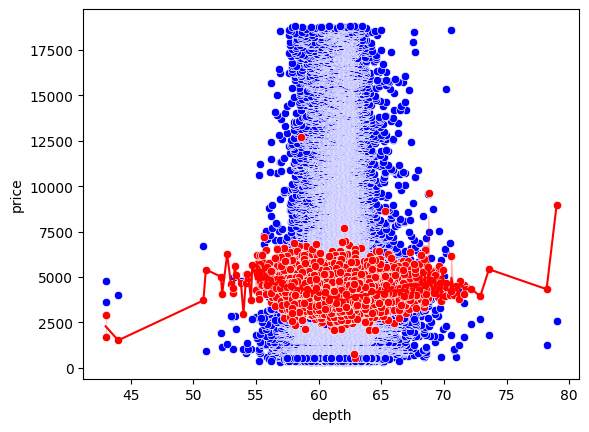

In [45]:
#depth y price
sns.scatterplot(x='depth', y='price', color="blue", data=data3)
sns.scatterplot(x='depth', y='Predicciones_6', color="red", data=data3)
sns.lineplot(x='depth', y='Predicciones_6', color="red", data=data3)

<AxesSubplot:xlabel='table', ylabel='price'>

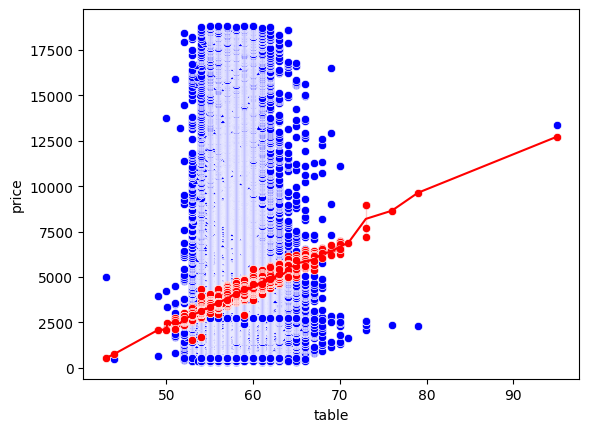

In [46]:
#table y price
sns.scatterplot(x='table', y='price', color="blue", data=data3)
sns.scatterplot(x='table', y='Predicciones_6', color="red", data=data3)
sns.lineplot(x='table', y='Predicciones_6', color="red", data=data3)

***tamaño (x, y, z) y price***    

In [47]:
#tamaño (x, y, z) y price

model7 = smf.ols('price ~ tamaño', data=data3).fit()
model7.params

Intercept   -2359.130021
tamaño         48.495556
dtype: float64

In [48]:
#Agregamos la columna de predicción al dataframe
Form7= -14270.012531+ 1213.034294*data3["tamaño"]
data3.insert(loc=1, column='Predicciones_7', value=Form7)
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 3.167e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:12:44   Log-Likelihood:            -4.7108e+05
No. Observations:               53879   AIC:                         9.422e+05
Df Residuals:                   53877   BIC:                         9.422e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2359.1300     12.936   -182.366      0.000   -2384.485   -2333.775
tamaño        48.4956      0.086    562.744      0.000      48.327      48.664
==============================================================================
Omnibus:                    15972.817   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347729.079
Skew:                           0.909   Prob(JB):                         0.00
Kurtosis:                      15.312   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='tamaño', ylabel='price'>

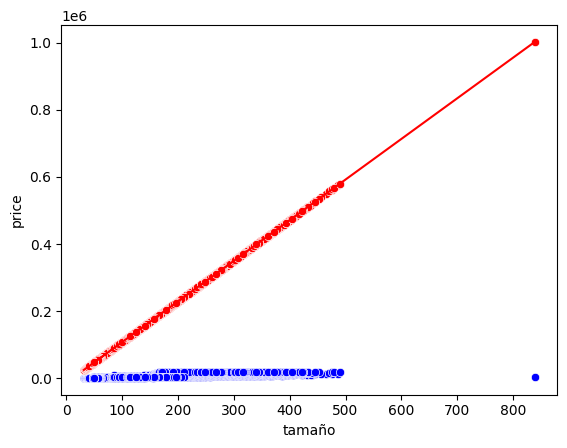

In [49]:
#tamaño y price
sns.scatterplot(x='tamaño', y='price', color="blue", data=data3)
sns.scatterplot(x='tamaño', y='Predicciones_7', color="red", data=data3)
sns.lineplot(x='tamaño', y='Predicciones_7', color="red", data=data3)

***tamaño, carat, depth y price***

In [50]:
#tamaño, carat, depth y price

model8 = smf.ols('price ~ tamaño + carat + depth', data=data3).fit()
model8.params

Intercept    1833.341419
tamaño         31.824303
carat        2700.161998
depth         -67.725310
dtype: float64

In [51]:
#Agregamos la columna de predicción al dataframe
Form8= 11617.082292  -604.756024*data3["tamaño"]+11507.591361*data3["carat"]-126.041154*data3["depth"]
data3.insert(loc=1, column='Predicciones_8', value=Form8)
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.062e+05
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:16:53   Log-Likelihood:            -4.7095e+05
No. Observations:               53879   AIC:                         9.419e+05
Df Residuals:                   53875   BIC:                         9.419e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1833.3414    293.626      6.244      0.000    1257.832    2408.851
tamaño        31.8243      1.444     22.043      0.000      28.995      34.654
carat       2700.1620    233.332     11.572      0.000    2242.829    3157.495
depth        -67.7253      4.747    -14.266      0.000     -77.030     -58.421
==============================================================================
Omnibus:                    15032.394   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135395.708
Skew:                           1.086   Prob(JB):                         0.00
Kurtosis:                      10.456   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='tamaño', ylabel='price'>

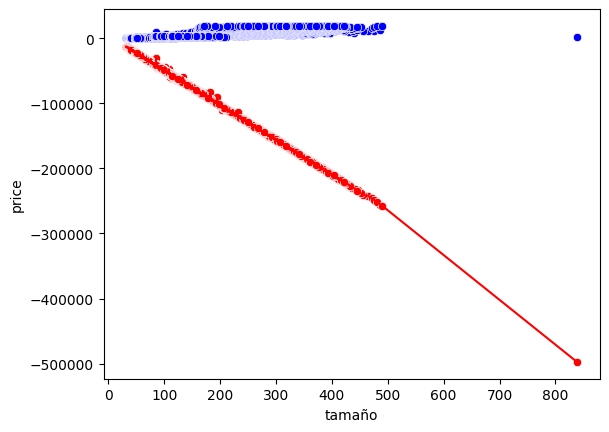

In [52]:
#tamaño y price
sns.scatterplot(x='tamaño', y='price', color="blue", data=data3)
sns.scatterplot(x='tamaño', y='Predicciones_8', color="red", data=data3)
sns.lineplot(x='tamaño', y='Predicciones_8', color="red", data=data3)

<AxesSubplot:xlabel='carat', ylabel='price'>

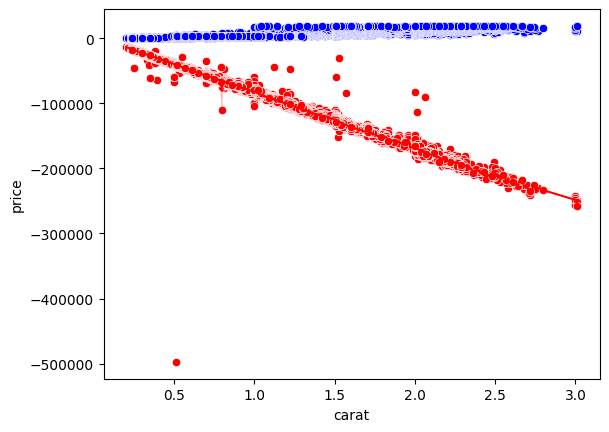

In [53]:
#carat y price
sns.scatterplot(x='carat', y='price', color="blue", data=data3)
sns.scatterplot(x='carat', y='Predicciones_8', color="red", data=data3)
sns.lineplot(x='carat', y='Predicciones_8', color="red", data=data3)

<AxesSubplot:xlabel='depth', ylabel='price'>

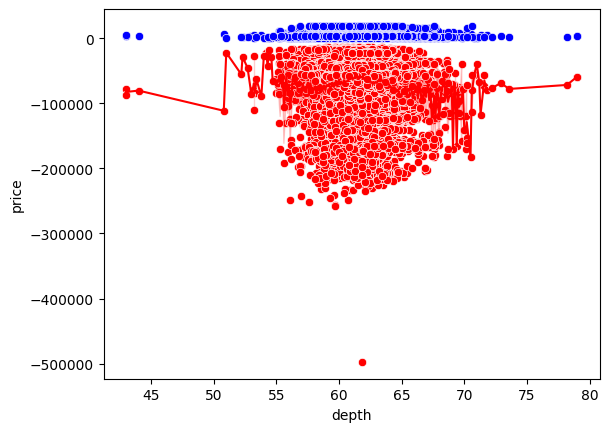

In [54]:
#depth y price
sns.scatterplot(x='depth', y='price', color="blue", data=data3)
sns.scatterplot(x='depth', y='Predicciones_8', color="red", data=data3)
sns.lineplot(x='depth', y='Predicciones_8', color="red", data=data3)

***tamaño, carat, depth,table y price***

In [55]:
#tamaño, carat, depth,table y price
model9 = smf.ols('price ~ tamaño + carat + depth + table', data=data3).fit()
model9.params

Intercept    10569.875850
tamaño          20.317726
carat         4641.522939
depth         -122.504205
table          -94.133534
dtype: float64

In [56]:
#Agregamos la columna de predicción al dataframe
Form9= 20826.587800-607.627001*data3["tamaño"]+11621.644253*data3["carat"]-176.403930*data3["depth"]-106.992253*data3["table"]
data3.insert(loc=1, column='Predicciones_9', value=Form9)
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 8.111e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:21:36   Log-Likelihood:            -4.7052e+05
No. Observations:               53879   AIC:                         9.410e+05
Df Residuals:                   53874   BIC:                         9.411e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.057e+04    416.437     25.382      0.000    9753.655    1.14e+04
tamaño        20.3177      1.485     13.682      0.000      17.407      23.228
carat       4641.5229    240.750     19.279      0.000    4169.651    5113.395
depth       -122.5042      5.066    -24.182      0.000    -132.433    -112.575
table        -94.1335      3.206    -29.358      0.000    -100.418     -87.849
==============================================================================
Omnibus:                    14846.609   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           110369.439
Skew:                           1.126   Prob(JB):                         0.00
Kurtosis:                       9.640   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='tamaño', ylabel='price'>

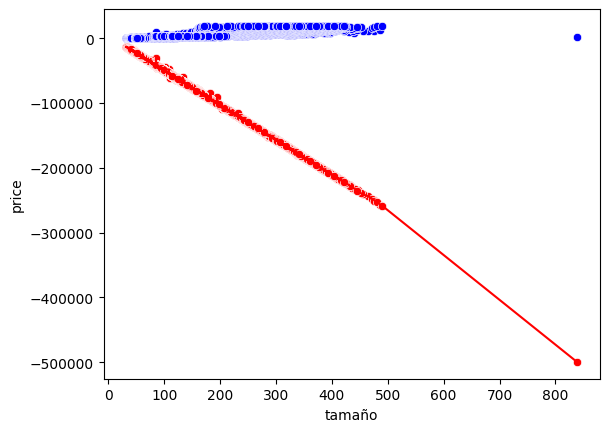

In [57]:
#tamaño y price
sns.scatterplot(x='tamaño', y='price', color="blue", data=data3)
sns.scatterplot(x='tamaño', y='Predicciones_9', color="red", data=data3)
sns.lineplot(x='tamaño', y='Predicciones_9', color="red", data=data3)

<AxesSubplot:xlabel='carat', ylabel='price'>

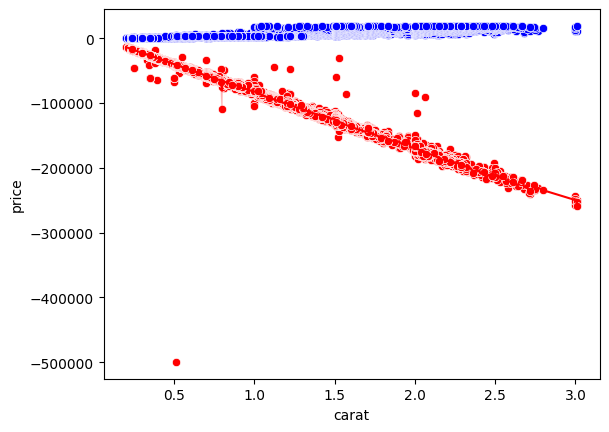

In [58]:
#carat y price
sns.scatterplot(x='carat', y='price', color="blue", data=data3)
sns.scatterplot(x='carat', y='Predicciones_9', color="red", data=data3)
sns.lineplot(x='carat', y='Predicciones_9', color="red", data=data3)

<AxesSubplot:xlabel='depth', ylabel='price'>

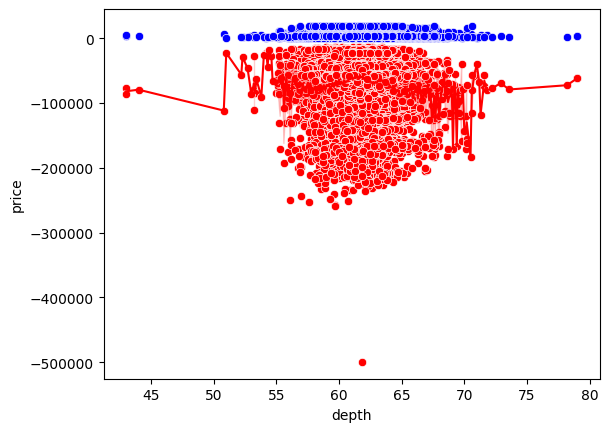

In [59]:
#depth y price
sns.scatterplot(x='depth', y='price', color="blue", data=data3)
sns.scatterplot(x='depth', y='Predicciones_9', color="red", data=data3)
sns.lineplot(x='depth', y='Predicciones_9', color="red", data=data3)

<AxesSubplot:xlabel='table', ylabel='price'>

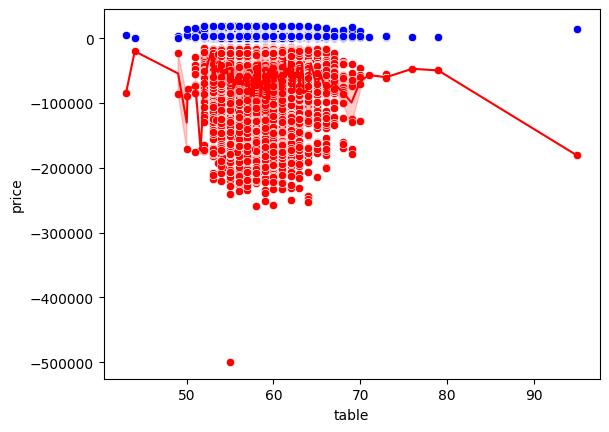

In [60]:
#table y price
sns.scatterplot(x='table', y='price', color="blue", data=data3)
sns.scatterplot(x='table', y='Predicciones_9', color="red", data=data3)
sns.lineplot(x='table', y='Predicciones_9', color="red", data=data3)

**Coeficientes de correlación R**

In [61]:
#carat y precio
coef_Correl= np.sqrt(0.853)
coef_Correl

0.9235799911215054

In [62]:
#depth y precio
coef_Correl2= np.sqrt(0.000)
coef_Correl2

0.0

In [63]:
#table y precio
coef_Correl3= np.sqrt(0.016)
coef_Correl3

0.12649110640673517

In [64]:
#carat, depth y precio
coef_Correl4= np.sqrt(0.854)
coef_Correl4

0.9241212041718337

In [65]:
#Carat,table y precio
coef_Correl5= np.sqrt(0.855)
coef_Correl5


0.9246621004453465

In [66]:
#depth,table y price
coef_Correl6= np.sqrt(0.017)
coef_Correl6

0.130384048104053

In [67]:
#tamaño (x,y y z) y price
coef_Correl7= np.sqrt(0.787)
coef_Correl7

0.887130204648675

In [68]:
#tamaño, carat, depth y price
coef_Correl8= np.sqrt(0.862)
coef_Correl8

0.9284395510748128

In [69]:
#tamaño, carat, depth, table y price
coef_Correl9= np.sqrt(0.865)
coef_Correl9

0.9300537618869137

In [70]:
#Encontramos todas las correlaciones entre las variables y aplicamos valor absoluto
CorreTotal=data.corr()
CorreTotal2= abs(CorreTotal)
CorreTotal2

,Unnamed: 0,carat,depth,table,price,x,y,z,tamaño
Unnamed: 0,1.000000,0.381048,0.034935,0.100954,0.307629,0.407329,0.405504,0.410518,0.378462
carat,0.381048,1.000000,0.023556,0.182737,0.923442,0.978941,0.972833,0.977555,0.998078
depth,0.034935,0.023556,1.000000,0.296105,0.013108,0.028038,0.030961,0.093591,0.006158
table,0.100954,0.182737,0.296105,1.000000,0.127222,0.196486,0.188854,0.156220,0.172901
price,0.307629,0.923442,0.013108,0.127222,1.000000,0.887007,0.883873,0.882180,0.924421
x,0.407329,0.978941,0.028038,0.196486,0.887007,1.000000,0.993332,0.991359,0.979259
y,0.405504,0.972833,0.030961,0.188854,0.883873,0.993332,1.000000,0.986996,0.978028
z,0.410518,0.977555,0.093591,0.156220,0.882180,0.991359,0.986996,1.000000,0.976369
tamaño,0.378462,0.998078,0.006158,0.172901,0.924421,0.979259,0.978028,0.976369,1.000000


<AxesSubplot:>

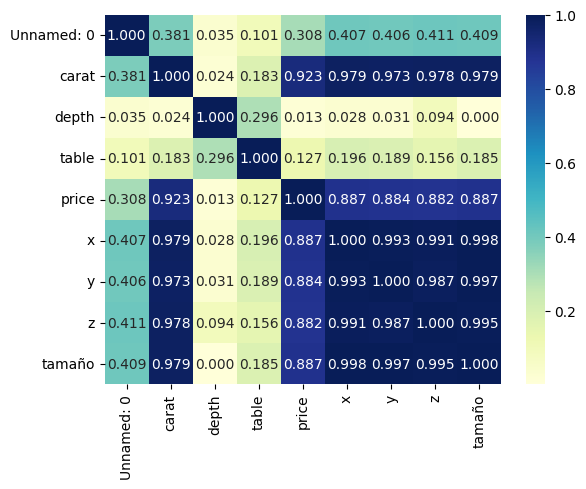

In [70]:
#Mapa de calor para visualizar los coefiecientes de correlación de nuestas diferentes variables
Heat_Map= sns.heatmap(CorreTotal2, cmap = 'YlGnBu', annot=True, fmt=".3f")  
Heat_Map